In [3]:
# read in a text file as a list of lines
def read_file_as_lines(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return [line.strip() for line in lines]

In [64]:
input

['.......S.......',
 '...............',
 '.......^.......',
 '...............',
 '......^.^......',
 '...............',
 '.....^.^.^.....',
 '...............',
 '....^.^...^....',
 '...............',
 '...^.^...^.^...',
 '...............',
 '..^...^.....^..',
 '...............',
 '.^.^.^.^.^...^.',
 '...............']

In [105]:
input = read_file_as_lines('sample.txt')

processed_input = input.copy()
for idx, line in enumerate(input): 
    hat_matches = [m.start() for m in re.finditer('\^', line)]
    for match in hat_matches:
        processed_input[idx+1] = processed_input[idx+1][:match-1] + '|' + processed_input[idx+1][match] + '|' + processed_input[idx+1][match+2:]
        processed_input[idx]= processed_input[idx][:match-1] + '|' + processed_input[idx][match] + '|' + processed_input[idx][match+2:]

    if idx > 0:
        line_matches = [m.start() for m in re.finditer('\|', processed_input[idx-1])]
        for match in line_matches:
            if idx < len(processed_input) and processed_input[idx][match] == '.':
                processed_input[idx] = processed_input[idx][:match] + '|' + processed_input[idx][match+1:] 

processed_input

<>:5: SyntaxWarning: invalid escape sequence '\^'
<>:11: SyntaxWarning: invalid escape sequence '\|'
<>:5: SyntaxWarning: invalid escape sequence '\^'
<>:11: SyntaxWarning: invalid escape sequence '\|'
/var/folders/2d/w2420k4x6gn7kdpfc68ywl6c0000gp/T/ipykernel_20940/498836782.py:5: SyntaxWarning: invalid escape sequence '\^'
  hat_matches = [m.start() for m in re.finditer('\^', line)]
/var/folders/2d/w2420k4x6gn7kdpfc68ywl6c0000gp/T/ipykernel_20940/498836782.py:11: SyntaxWarning: invalid escape sequence '\|'
  line_matches = [m.start() for m in re.finditer('\|', processed_input[idx-1])]


['.......S.......',
 '...............',
 '......|^|......',
 '......|.|......',
 '.....|^|^|.....',
 '.....|.|.|.....',
 '....|^|^|^|....',
 '....|.|.|.|....',
 '...|^|^|||^|...',
 '...|.|.|||.|...',
 '..|^|^|||^|^|..',
 '..|.|.|||.|.|..',
 '.|^|||^||.||^|.',
 '.|.|||.||.||.|.',
 '|^|^|^|^|^|||^|',
 '|.|.|.|.|.|||.|']

In [103]:
# count splits
import re

count = 0
hat_count = 0
for idx, input in enumerate(processed_input):
    if idx > 1:
        splits = [m.start() for m in re.finditer('\^', input)]
        for split in splits:
            if processed_input[idx-1][split] == '|':
                count += 1


<>:8: SyntaxWarning: invalid escape sequence '\^'
<>:8: SyntaxWarning: invalid escape sequence '\^'
/var/folders/2d/w2420k4x6gn7kdpfc68ywl6c0000gp/T/ipykernel_20940/3920438746.py:8: SyntaxWarning: invalid escape sequence '\^'
  splits = [m.start() for m in re.finditer('\^', input)]


In [ ]:
count+1







1678

In [198]:
# PART 2

import networkx as nx
G = nx.Graph()

# translate input into graph
for idx, line in enumerate(processed_input):
    # add nodes
    for col, char in enumerate(line):
        if char in ['^']:
            G.add_node((idx, col))

        if char in ['|'] and idx == len(processed_input)-1: # last line
            G.add_node((idx, col))


                

In [187]:
# transpose processed_input
transposed_input = [''.join(row) for row in zip(*processed_input)]


In [188]:
transposed_input

['..............||',
 '............||^.',
 '..........||^.||',
 '........||^.||^.',
 '......||^.||||||',
 '....||^.||^.||^.',
 '..||^.||^.||^.||',
 'S.^.||^.||||||^.',
 '..||^.||||||||||',
 '....||^.||^...^.',
 '......||^.||||||',
 '........||^.||||',
 '..........||^.||',
 '............||^.',
 '..............||']

In [199]:
for col_idx, col in enumerate(transposed_input):
    # find start and end points of each vertical line
    line_positions = [m.start() for m in re.finditer('\|', col)]
    # split line position into lists of incrementing sequences
    sequences = []
    current_sequence = []
    for i in range(len(line_positions)):
        if i == 0 or line_positions[i] == line_positions[i-1] + 1:
            current_sequence.append(line_positions[i])
        else:
            sequences.append(current_sequence)
            current_sequence = [line_positions[i]]
    if current_sequence:
        sequences.append(current_sequence)

    # now for each sequence, add edges between start and end nodes
    for seq in sequences:
        if len(seq) >= 2:
            start = seq[0]
            end = seq[-1]

            # check if there is a hat below or above the start
            if start > 0 and (start, col_idx-1) in G.nodes():
                if end == len(processed_input)-1:
                    G.add_edge((start, col_idx-1), (end, col_idx))
                else:
                    G.add_edge((start, col_idx-1), (end+1, col_idx))


            if start > 0 and (start, col_idx+1) in G.nodes():
                if end == len(processed_input)-1:
                    G.add_edge((start, col_idx+1), (end, col_idx))
                else:
                    G.add_edge((start, col_idx+1), (end+1, col_idx))

            # connect to the final layer




<>:3: SyntaxWarning: invalid escape sequence '\|'
<>:3: SyntaxWarning: invalid escape sequence '\|'
/var/folders/2d/w2420k4x6gn7kdpfc68ywl6c0000gp/T/ipykernel_20940/734340242.py:3: SyntaxWarning: invalid escape sequence '\|'
  line_positions = [m.start() for m in re.finditer('\|', col)]


37

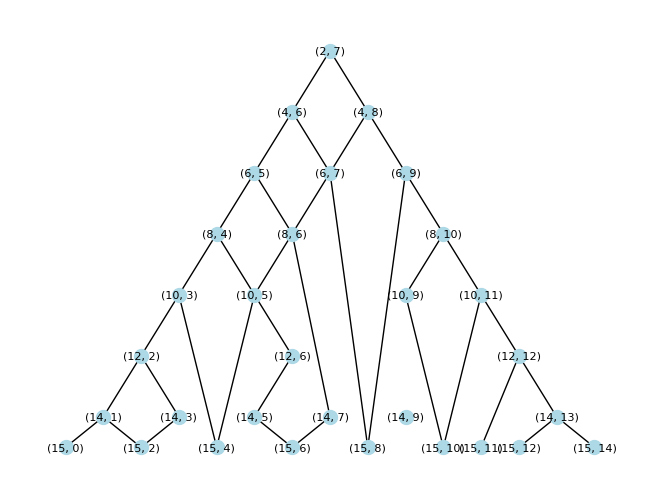

In [200]:
# plot graph and edges

pos = {node: (node[1], -node[0]) for node in G.nodes()}
nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightblue', font_size=8)

G.number_of_edges()



In [214]:
# count the number of paths until the end that a depth first search would take from top to bottom
start_nodes = [node for node in G.nodes() if node[0] == 2]
end_nodes = [node for node in G.nodes() if node[0] == len(processed_input)-1]


total_paths = 0
for start in start_nodes:
    for end in end_nodes:
        # the path can only go downwards
        paths = list(nx.all_simple_paths(G, source=start, target=end))

        # check if the first node coordinate keeps increasing in each path 
        # otherwise delete

        paths_processed = []
        for path in paths:
            valid = True
            for i in range(1, len(path)):
                if path[i][0] < path[i-1][0]:
                    valid = False
                    break
            if valid:
                paths_processed.append(path)

        print(paths_processed)
        total_paths += len(paths_processed)



[[(2, 7), (4, 6), (6, 5), (8, 4), (10, 3), (12, 2), (14, 1), (15, 0)]]
[[(2, 7), (4, 6), (6, 5), (8, 4), (10, 3), (12, 2), (14, 1), (15, 2)], [(2, 7), (4, 6), (6, 5), (8, 4), (10, 3), (12, 2), (14, 3), (15, 2)]]
[[(2, 7), (4, 6), (6, 5), (8, 4), (10, 3), (15, 4)], [(2, 7), (4, 6), (6, 5), (8, 4), (10, 5), (15, 4)], [(2, 7), (4, 6), (6, 5), (8, 6), (10, 5), (15, 4)], [(2, 7), (4, 6), (6, 7), (8, 6), (10, 5), (15, 4)], [(2, 7), (4, 8), (6, 7), (8, 6), (10, 5), (15, 4)]]
[[(2, 7), (4, 6), (6, 5), (8, 4), (10, 5), (12, 6), (14, 5), (15, 6)], [(2, 7), (4, 6), (6, 5), (8, 6), (10, 5), (12, 6), (14, 5), (15, 6)], [(2, 7), (4, 6), (6, 5), (8, 6), (14, 7), (15, 6)], [(2, 7), (4, 6), (6, 7), (8, 6), (10, 5), (12, 6), (14, 5), (15, 6)], [(2, 7), (4, 6), (6, 7), (8, 6), (14, 7), (15, 6)], [(2, 7), (4, 8), (6, 7), (8, 6), (10, 5), (12, 6), (14, 5), (15, 6)], [(2, 7), (4, 8), (6, 7), (8, 6), (14, 7), (15, 6)]]
[[(2, 7), (4, 6), (6, 7), (15, 8)], [(2, 7), (4, 8), (6, 7), (15, 8)], [(2, 7), (4, 8), (6

In [215]:
total_paths

23